In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [20]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col="EmployeeNumber")

In [21]:
X = df_raw.drop('Attrition', axis=1)
y = df_raw['Attrition']

In [22]:
from pycaret.classification import *

setup_clf = setup(data=df_raw, target='Attrition', train_size=0.7, 
                  normalize=True, normalize_method='zscore', transformation=True,
                  session_id=777)

,Description,Value
0,Session id,777
1,Target,Attrition
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(1470, 34)"
5,Transformed data shape,"(1470, 53)"
6,Transformed train set shape,"(1029, 53)"
7,Transformed test set shape,"(441, 53)"
8,Ordinal features,2
9,Numeric features,25


In [23]:
model = compare_models(sort='Accuracy', fold = 5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8756,0.8219,0.4219,0.6994,0.5228,0.4563,0.4774,1.0560
lda,Linear Discriminant Analysis,0.8727,0.8180,0.4098,0.6843,0.5093,0.4415,0.4624,0.4900
ada,Ada Boost Classifier,0.8629,0.7864,0.3615,0.6373,0.4598,0.3882,0.4095,0.7720
ridge,Ridge Classifier,0.8610,0.0000,0.1872,0.7651,0.2977,0.2536,0.3320,0.5020
xgboost,Extreme Gradient Boosting,0.8581,0.7959,0.2770,0.6446,0.3857,0.3197,0.3572,1.1140
gbc,Gradient Boosting Classifier,0.8562,0.8097,0.2406,0.6471,0.3500,0.2878,0.3330,1.3680
lightgbm,Light Gradient Boosting Machine,0.8542,0.7975,0.2289,0.6312,0.3355,0.2735,0.3184,0.8380
et,Extra Trees Classifier,0.8513,0.7788,0.1629,0.6525,0.2589,0.2092,0.2727,1.0420
knn,K Neighbors Classifier,0.8455,0.6665,0.1266,0.6067,0.2063,0.1603,0.2227,0.7880
rf,Random Forest Classifier,0.8455,0.7828,0.0722,0.7900,0.1316,0.1048,0.2044,1.3700


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [26]:
model = create_model('lr') # 특정 모델로 학습
tuned = tune_model(model, optimize='Accuracy',fold=5, n_iter=500) 
final_model = finalize_model(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8932,0.8204,0.5000,0.7273,0.5926,0.5336,0.5460
1,0.8447,0.8218,0.3750,0.5000,0.4286,0.3408,0.3455
2,0.9029,0.8542,0.4375,0.8750,0.5833,0.5352,0.5765
3,0.9320,0.9200,0.5882,1.0000,0.7407,0.7046,0.7375
4,0.8641,0.7339,0.2353,0.8000,0.3636,0.3120,0.3863
5,0.8641,0.8352,0.3529,0.6667,0.4615,0.3921,0.4181
6,0.8252,0.7367,0.2941,0.4545,0.3571,0.2614,0.2697
7,0.8738,0.8126,0.4118,0.7000,0.5185,0.4515,0.4725
8,0.8641,0.8345,0.4118,0.6364,0.5000,0.4255,0.4390


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8689,0.8508,0.3030,0.7143,0.4255,0.3649,0.4079
1,0.8981,0.8716,0.3636,1.0000,0.5333,0.4897,0.5695
2,0.8641,0.7796,0.2121,0.7778,0.3333,0.2842,0.3599
3,0.8689,0.7632,0.2941,0.7692,0.4255,0.3678,0.4224
4,0.8878,0.8608,0.3636,0.8571,0.5106,0.4587,0.5129
Mean,0.8776,0.8252,0.3073,0.8237,0.4457,0.3931,0.4545
Std,0.0131,0.0447,0.0559,0.0992,0.0712,0.0734,0.0759


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [27]:
# 최적화한 모델의 hyper-parameter 확인
final_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'DailyRate',
                                             'DistanceFromHome', 'Education',
                                             'EmployeeCount',
                                             'EnvironmentSatisfaction',
                                             'HourlyRate', 'JobInvolvement',
                                             'JobLeve...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 LogisticRegression(C=0.043, class_weight={}, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=777,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

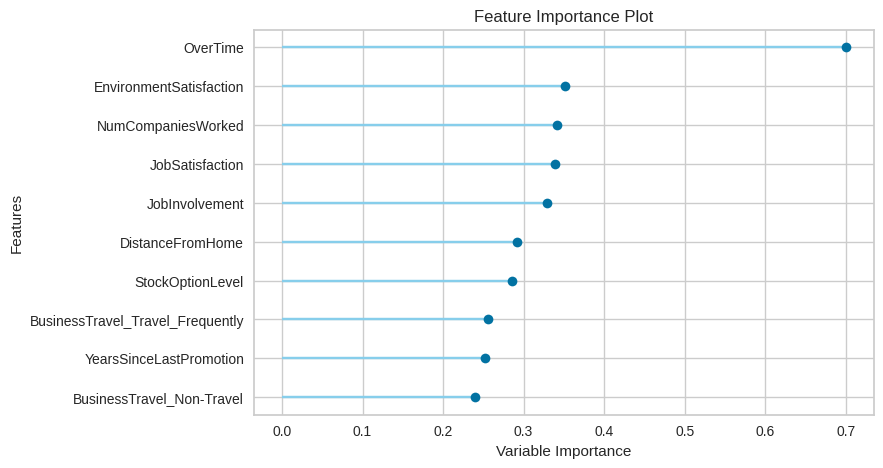

In [28]:
# 최종 모델의 feature importacne
plot_model(final_model, plot='feature')